**Script Name:** Model_Performance_on_Test_Images.ipynb

**Function:** This script test the performance of the Website Saliency Model on the test data.The heatmap for the test data has been generated at the very begining. So For this prediction, the only preprocessing needs to be done is mean value subtraction and image resizing to 224*224

In [1]:
# Connect to the Google
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# import all the dependencies
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import load_model
from PIL import Image

Preprocess the Test images

sorted ['cell.png', 'ebay_music.png', 'flickr_cover.png', 'flipboard-editor.png', 'indiegogo.png', 'microsoft.png', 'pinterest_about.png', 'science.png']
cell.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


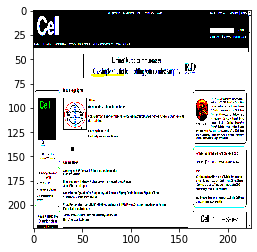

ebay_music.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


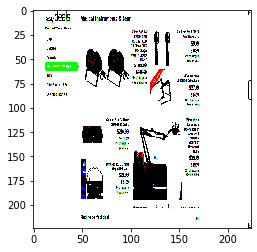

flickr_cover.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


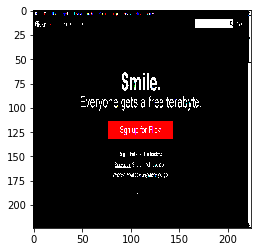

flipboard-editor.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


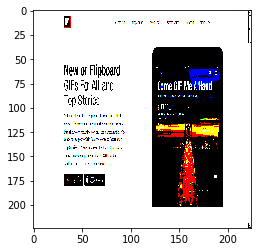

indiegogo.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


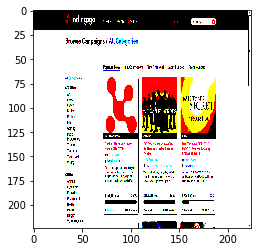

microsoft.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


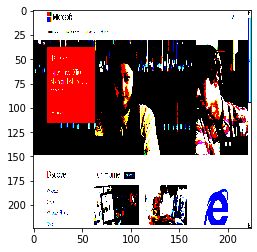

pinterest_about.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


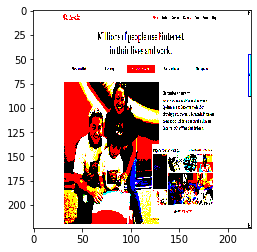

science.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


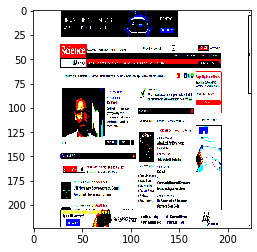

(8, 224, 224, 3)


In [3]:
from PIL import Image

n_classes=1
meanval= (192.19138, 191.60353, 190.41075)
#meanval=(104.00699, 116.66877, 122.67892)

# Uncomment and specify path for the Data

dir_data = "/content/drive/My Drive/HCI_prep/Dataset_Website1/test_case/"
#dir_data = "/content/drive/My Drive/HCI_prep/Prediction_and_Analysis/Generalization_Data/MIT_Dataset/test_stimuli/"
#dir_data = "/content/drive/My Drive/HCI_prep/Prediction_and_Analysis/Generalization_Data/Massvis/stimuli/"

input_width, input_height=224,224

'''
Function Name: ImageArr()
Parameters: path, width, height,title
Functionalities: 1) Resizing to 224*224
                 2) Mean Value Reduction

Returns: preprocessed image 
'''
def ImageArr(path, width, height,title):
    print(title)

    # read the image from the path
    img = cv2.imread(path,1)
   
    # Resize image 224*224
    img = np.float32(cv2.resize(img, (width, height))) #/ 127.5 - 1

    # Meanvalue reduction
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img -= meanval
    #print(img)
    plt.imshow(img)
    plt.show()
    return img

images_data = os.listdir(dir_data)
images_data.sort()
print("sorted",images_data)


X = []

# Append the preprocssed images in the list
for im in images_data:
    X.append(ImageArr(dir_data+im, input_width, input_height,im))
  


X = np.array(X)
print(X.shape)

Predict Saliency for Test Images

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cell.png


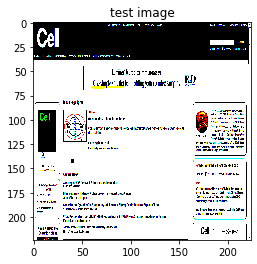

prediction shape (1, 224, 224, 1)
(224, 224, 1)
0.79389966


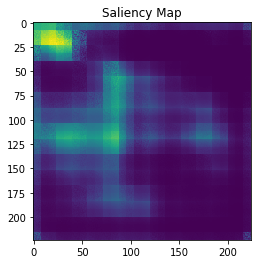

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ebay_music.png


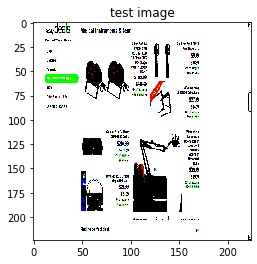

prediction shape (1, 224, 224, 1)
(224, 224, 1)
0.3697989


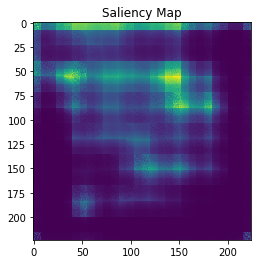

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


flickr_cover.png


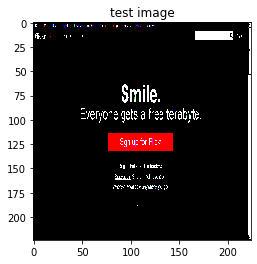

prediction shape (1, 224, 224, 1)
(224, 224, 1)
0.7541357


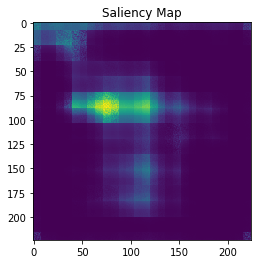

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


flipboard-editor.png


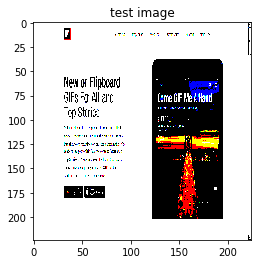

prediction shape (1, 224, 224, 1)
(224, 224, 1)
0.8781422


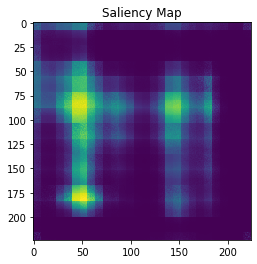

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


indiegogo.png


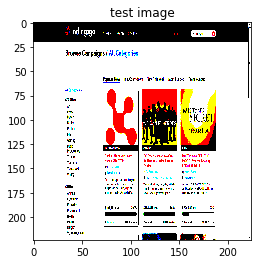

prediction shape (1, 224, 224, 1)
(224, 224, 1)
0.8096391


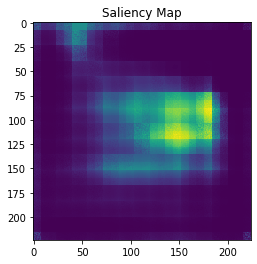

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


microsoft.png


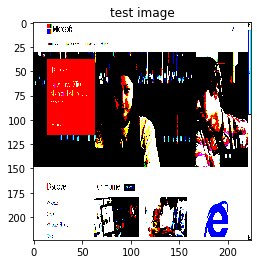

prediction shape (1, 224, 224, 1)
(224, 224, 1)
0.7901047


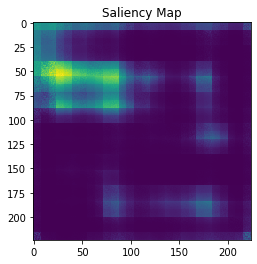

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pinterest_about.png


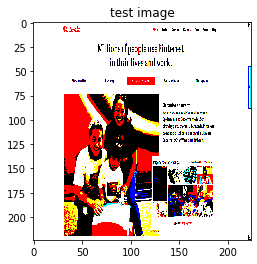

prediction shape (1, 224, 224, 1)
(224, 224, 1)
0.41326556


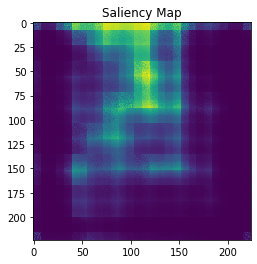

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


science.png


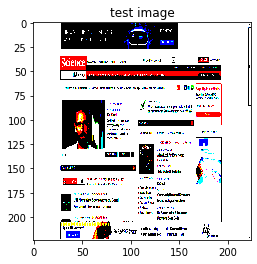

prediction shape (1, 224, 224, 1)
(224, 224, 1)
0.608059


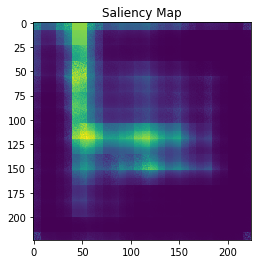

In [4]:

# Load the saved model
#with_weights_FiWi_fcn_25_02_2020_02_try57.h5
#with_weights_FiWi_fcn_24_02_2020_02_try57.h5
#with_weights_FiWi_fcn_20_01_2020_02.h5
#with_weights_FiWi_fcn_27_01_2020_02_try57.h5
#with_weights_FiWi_fcn_21_01_2020_02_try57.h5 

saved_model = load_model("/content/drive/My Drive/HCI_prep/with_weights_FiWi_fcn_16_latest.h5")#with_weights_FiWi_fcn_27_02_2020_02_try57.h5")
#img_is = cv2.imread(img)
c=1
for img_is,name in zip(X,images_data):
  print(name)
  # show the test image
  img_is=cv2.resize(img_is,(224,224))
  plt.imshow(img_is)
  plt.title("test image")
  plt.show()

  # The test data was preprocessed before, so no processing is required!
  # If not preprocessed then use then use the following commented section.
  '''
  # Resize the image
  width, height= 224,224
  img = np.float32(cv2.resize(img_is, ( width, height))) 

  # Meanvalue reduction
  meanval= (192.19138, 191.60353, 190.41075)
  # meanval=(104.00699, 116.66877, 122.67892)
  img -= meanval

  X= np.array(img)
  print(X.shape)
  #print(X)
  '''
  
  img= img_is.reshape(-1,224,224,3)
 
  # predict the saliency
  im_pred= saved_model.predict(img)
  print("prediction shape",im_pred.shape)

  # print(im_pred.max())
  # print(im_pred.min())
  # print(im_pred)

  rescaled_new= im_pred.reshape(224,224,1)

  print(rescaled_new.shape)
  print(rescaled_new.max())
  
  # rescaled_new[rescaled_new <.25] = 0
  # rescaled_new[rescaled_new >=.26] = 1
  # rescaled_new[rescaled_new >=.16] = 0.5

  # data=rescaled_new
  # print(rescaled_new)
  # rescaled_new= rescaled_new*255.0

  # Rescaling accoring to the base-paper
  rescaled_new = (255.0 / rescaled_new.max() * (rescaled_new - rescaled_new.min()))
  
  #im_new = Image.fromarray(rescaled)
  rescaled_new=cv2.resize(rescaled_new,(224,224))

  # Save the predicted images
  
  cv2.imwrite( "/content/drive/My Drive/HCI_prep/Prediction_and_Analysis/Evaluation_Data/FCN16/predicted_images/"+str(name), rescaled_new )
  #cv2.imwrite( "/content/drive/My Drive/HCI_prep/Prediction_and_Analysis/Generalization_Data/MIT_Dataset/predicted_image/"+str(name), rescaled_new )
  #cv2.imwrite( "/content/drive/My Drive/HCI_prep/Prediction_and_Analysis/Generalization_Data/Massvis/predicted_image/"+str(name), rescaled_new )
  plt.imshow(rescaled_new)
  plt.title("Saliency Map")
  plt.show()
  c=c+1